In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Accuracy for each datapoint (not divided by clusters assignments) considering the two dimensions separately

In [15]:
purity = 1.0
coverage = 100
general_folder = f"./results/p_{str(purity).replace('.', '')}_cov_{coverage}_old/"

### Accuracy D = 2

In [5]:
import os
import re
import ast

dim = 2
directory = general_folder + f"D_{dim}/csv/"


# Regular expression pattern to match the file names and extract N, K, D, and df values
pattern = re.compile(r'N_(\d+)_K_(\d+)_D_(\d+)_df_(\d+)\.csv')

# Dictionaries to store accuracy values for each (N, K, D) combination
accuracy_dict_1 = {}
accuracy_dict_2 = {}

# Iterate through files in the specified directory
for filename in os.listdir(directory):
    match = pattern.match(filename)
    if match:
        # Extract N, K, D, and df values from the file name
        N, K, D, df = map(int, match.groups())
        file_path = os.path.join(directory, filename)

        try:
            # Read the CSV file
            df_data = pd.read_csv(file_path)

            # Check if the necessary columns are present
            if 'True_distribution' in df_data.columns and 'Pred_distribution' in df_data.columns:
                true_dist = np.array([ast.literal_eval(item) for item in df_data['True_distribution']])
                pred_dist = np.array([ast.literal_eval(item) for item in df_data['Pred_distribution']])
                
                # Calculate accuracy for both dimensions
                accuracy_dim1 = np.mean(true_dist[:, 0] == pred_dist[:, 0])
                accuracy_dim2 = np.mean(true_dist[:, 1] == pred_dist[:, 1])

                # Store accuracies in separate dictionaries
                if (N, K, D) not in accuracy_dict_1:
                    accuracy_dict_1[(N, K, D)] = []
                accuracy_dict_1[(N, K, D)].append((df, accuracy_dim1))

                if (N, K, D) not in accuracy_dict_2:
                    accuracy_dict_2[(N, K, D)] = []
                accuracy_dict_2[(N, K, D)].append((df, accuracy_dim2))

        except Exception as e:
            print(f"Error processing file {filename}: {e}")

# Write accuracy values to text files for each (N, K, D) combination
for (N, K, D), acc_list in accuracy_dict_1.items():
    output_directory = f"./results/p_{str(purity).replace('.', '')}_cov_{coverage}_old/D_{D}/acc_per_dimension"
    os.makedirs(output_directory, exist_ok=True)
    output_file_path = os.path.join(output_directory, f'acc_N_{N}_K_{K}_D_{D}_1.txt')
    with open(output_file_path, 'w') as f:
        for _, accuracy in acc_list:
            f.write(f"{accuracy}\n")
    print(f'Accuracy values for N={N}, K={K}, D={D} (Dim 1) written to {output_file_path}')

for (N, K, D), acc_list in accuracy_dict_2.items():
    output_directory = f"./results/p_{str(purity).replace('.', '')}_cov_{coverage}_old/D_{D}/acc_per_dimension"
    os.makedirs(output_directory, exist_ok=True)
    output_file_path = os.path.join(output_directory, f'acc_N_{N}_K_{K}_D_{D}_2.txt')
    with open(output_file_path, 'w') as f:
        for _, accuracy in acc_list:
            f.write(f"{accuracy}\n")
    print(f'Accuracy values for N={N}, K={K}, D={D} (Dim 2) written to {output_file_path}')


Accuracy values for N=500, K=8, D=2 (Dim 1) written to ./results/p_10_cov_100_old/D_2/acc_per_dimension/acc_N_500_K_8_D_2_1.txt
Accuracy values for N=5000, K=3, D=2 (Dim 1) written to ./results/p_10_cov_100_old/D_2/acc_per_dimension/acc_N_5000_K_3_D_2_1.txt
Accuracy values for N=10000, K=3, D=2 (Dim 1) written to ./results/p_10_cov_100_old/D_2/acc_per_dimension/acc_N_10000_K_3_D_2_1.txt
Accuracy values for N=5000, K=5, D=2 (Dim 1) written to ./results/p_10_cov_100_old/D_2/acc_per_dimension/acc_N_5000_K_5_D_2_1.txt
Accuracy values for N=500, K=3, D=2 (Dim 1) written to ./results/p_10_cov_100_old/D_2/acc_per_dimension/acc_N_500_K_3_D_2_1.txt
Accuracy values for N=10000, K=8, D=2 (Dim 1) written to ./results/p_10_cov_100_old/D_2/acc_per_dimension/acc_N_10000_K_8_D_2_1.txt
Accuracy values for N=500, K=5, D=2 (Dim 1) written to ./results/p_10_cov_100_old/D_2/acc_per_dimension/acc_N_500_K_5_D_2_1.txt
Accuracy values for N=10000, K=5, D=2 (Dim 1) written to ./results/p_10_cov_100_old/D_2/acc_

### Boxplots for accuracy
(Extracting the values from the corresponding txt files)

DImension 1

/var/folders/z4/6ll9fb5s3k52m037sj27846c0000gn/T/ipykernel_2635/4191368094.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot([data_acc], notch=False, patch_artist=True, widths=0.3, labels=['Accuracy'])
/var/folders/z4/6ll9fb5s3k52m037sj27846c0000gn/T/ipykernel_2635/4191368094.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot([data_acc], notch=False, patch_artist=True, widths=0.3, labels=['Accuracy'])
/var/folders/z4/6ll9fb5s3k52m037sj27846c0000gn/T/ipykernel_2635/4191368094.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot([data_acc], notch=False, patch_artis

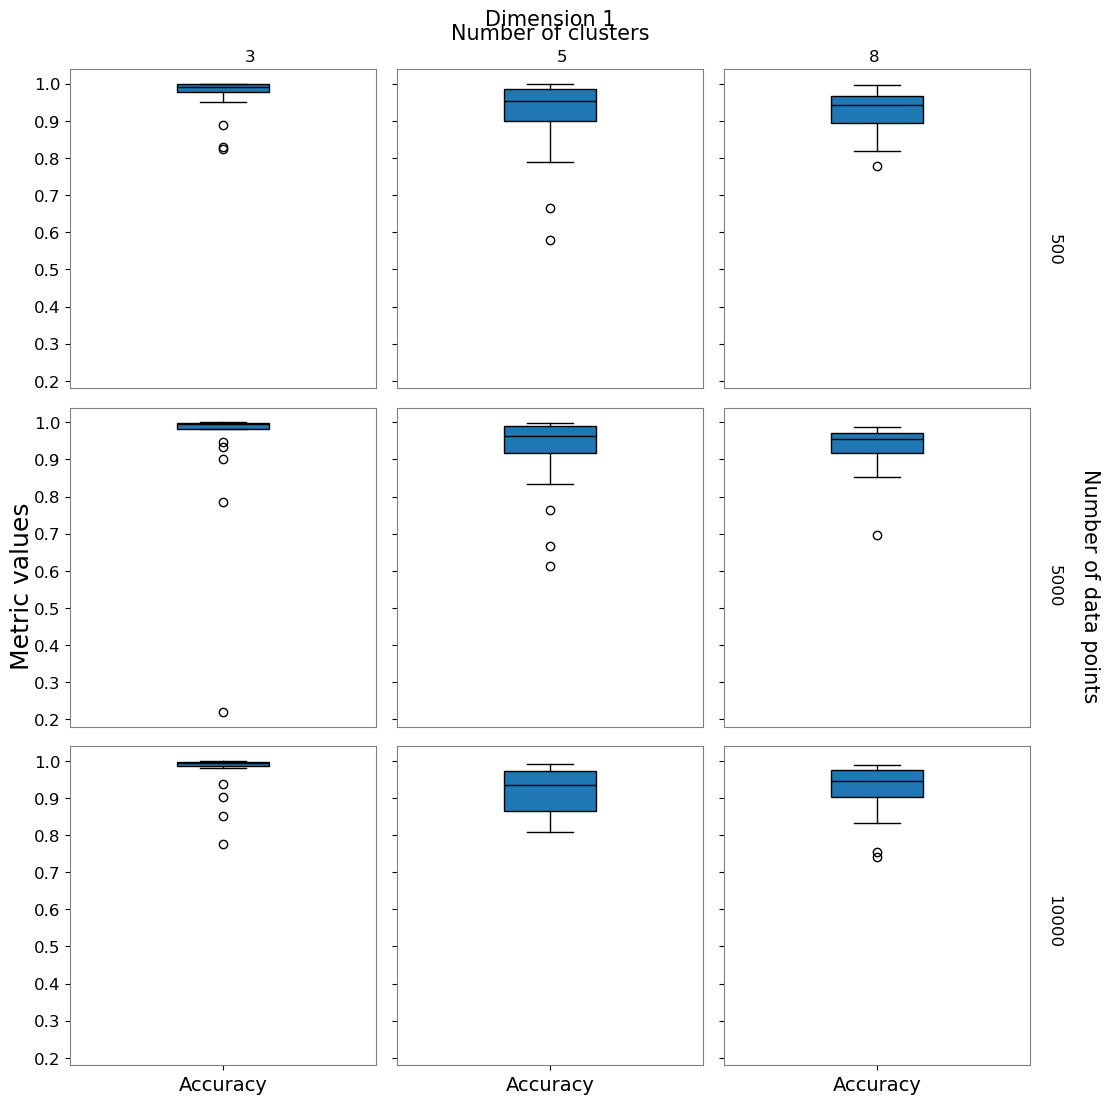

In [13]:
N_values = [500, 5000, 10000]
K_values = [3, 5, 8]
D_value = 2

# Create the figure and axes for the subplots with the new size
# fig, axes = plt.subplots(len(N_values), len(K_values), figsize=(20, 20), sharey=True)
fig, axes = plt.subplots(len(N_values), len(K_values), figsize=(12, 12), sharey=True)

# Loop over the specified values of N and K
for i, N in enumerate(N_values):
    for j, K in enumerate(K_values):
        # File path for accuracy data
        filename_acc = general_folder + f"D_{D_value}/acc_per_dimension/acc_N_{N}_K_{K}_D_{D_value}_1.txt"

        # Check if the file exists
        data_acc = None
        if os.path.isfile(filename_acc):
            data_acc = pd.read_csv(filename_acc, header=None).squeeze()

        # Plot the boxplot only if the accuracy data file is available
        if data_acc is not None:
            ax = axes[i, j]
            box = ax.boxplot([data_acc], notch=False, patch_artist=True, widths=0.3, labels=['Accuracy'])

            # Set x-tick labels only for the last row
            if i == len(N_values) - 1:
                ax.set_xticklabels(['Accuracy'], fontsize=14)
            else:
                ax.set_xticks([])  # Remove x-ticks for other rows

            # Set font size for y-axis tick labels
            ax.tick_params(axis='y', labelsize=12)

            # Set color for the boxplot
            box['boxes'][0].set_facecolor('tab:blue')
            box['boxes'][0].set_edgecolor('black')

            # Set the color of all lines in the boxplot to black
            for line_type in ['whiskers', 'caps', 'medians', 'fliers']:
                for line in box[line_type]:
                    line.set_color('black')

            # Make all the spines (borders) visible and set color
            for spine in ax.spines.values():
                spine.set_visible(True)
                spine.set_edgecolor('gray')

# Adding external labels for rows (Number of data points) and columns (Number of clusters)
# Column labels for different values of K
for j, K in enumerate(K_values):
    fig.text(0.25 + j * 0.26, 0.94, f'{K}', va='center', ha='center', fontsize=12)

# Adding a central label for the overall description of columns
fig.text(0.5, 0.96, 'Number of clusters', va='center', ha='center', fontsize=15)

# Adding the label for "Number of data points" and corresponding N values on the right
fig.text(0.95, 0.5, 'Number of data points', va='center', ha='center', rotation=-90, fontsize=15)
for i, N in enumerate(N_values):
    fig.text(0.92, 0.78 - i * 0.28, f'{N}', va='center', ha='center', rotation=-90, fontsize=12)

# Adjust layout to make space for the plot
plt.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])
plt.subplots_adjust(left=0.1, right=0.9, top=0.93, bottom=0.1)

plt.suptitle("Dimension 1\n\n", fontsize=15)
# Set the overall Y-axis label
fig.text(0.05, 0.5, 'Metric values', va='center', rotation='vertical', fontsize=18)

# plt.ylim([0.75, 1.01])

# Show plot
plt.show()


Dimension 2

In [1]:
N_values = [500, 5000, 10000]
K_values = [3, 5, 8]
D_value = 2

# Create the figure and axes for the subplots with the new size
# fig, axes = plt.subplots(len(N_values), len(K_values), figsize=(20, 20), sharey=True)
fig, axes = plt.subplots(len(N_values), len(K_values), figsize=(12, 12), sharey=True)

# Loop over the specified values of N and K
for i, N in enumerate(N_values):
    for j, K in enumerate(K_values):
        # File path for accuracy data
        filename_acc = general_folder + f"D_{D_value}/acc_per_dimension/acc_N_{N}_K_{K}_D_{D_value}_2.txt"

        # Check if the file exists
        data_acc = None
        if os.path.isfile(filename_acc):
            data_acc = pd.read_csv(filename_acc, header=None).squeeze()

        # Plot the boxplot only if the accuracy data file is available
        if data_acc is not None:
            ax = axes[i, j]
            box = ax.boxplot([data_acc], notch=False, patch_artist=True, widths=0.3, labels=['Accuracy'])

            # Set x-tick labels only for the last row
            if i == len(N_values) - 1:
                ax.set_xticklabels(['Accuracy'], fontsize=14)
            else:
                ax.set_xticks([])  # Remove x-ticks for other rows

            # Set font size for y-axis tick labels
            ax.tick_params(axis='y', labelsize=12)

            # Set color for the boxplot
            box['boxes'][0].set_facecolor('tab:blue')
            box['boxes'][0].set_edgecolor('black')

            # Set the color of all lines in the boxplot to black
            for line_type in ['whiskers', 'caps', 'medians', 'fliers']:
                for line in box[line_type]:
                    line.set_color('black')

            # Make all the spines (borders) visible and set color
            for spine in ax.spines.values():
                spine.set_visible(True)
                spine.set_edgecolor('gray')

# Adding external labels for rows (Number of data points) and columns (Number of clusters)
# Column labels for different values of K
for j, K in enumerate(K_values):
    fig.text(0.25 + j * 0.26, 0.94, f'{K}', va='center', ha='center', fontsize=12)

# Adding a central label for the overall description of columns
fig.text(0.5, 0.96, 'Number of clusters', va='center', ha='center', fontsize=15)

# Adding the label for "Number of data points" and corresponding N values on the right
fig.text(0.95, 0.5, 'Number of data points', va='center', ha='center', rotation=-90, fontsize=15)
for i, N in enumerate(N_values):
    fig.text(0.92, 0.78 - i * 0.28, f'{N}', va='center', ha='center', rotation=-90, fontsize=12)

# Adjust layout to make space for the plot
plt.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])
plt.subplots_adjust(left=0.1, right=0.9, top=0.93, bottom=0.1)

plt.suptitle("Dimension 2\n\n", fontsize=15)
# Set the overall Y-axis label
fig.text(0.05, 0.5, 'Metric values', va='center', rotation='vertical', fontsize=18)

# plt.ylim([0.75, 1.01])

# Show plot
plt.show()


NameError: name 'plt' is not defined

/var/folders/z4/6ll9fb5s3k52m037sj27846c0000gn/T/ipykernel_2635/4219865293.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(
/var/folders/z4/6ll9fb5s3k52m037sj27846c0000gn/T/ipykernel_2635/4219865293.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(
/var/folders/z4/6ll9fb5s3k52m037sj27846c0000gn/T/ipykernel_2635/4219865293.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(
/var/folders/z4/6ll9fb5s3k52m037sj27846c0000gn/T/ipykernel_2635/4219865293.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Ma

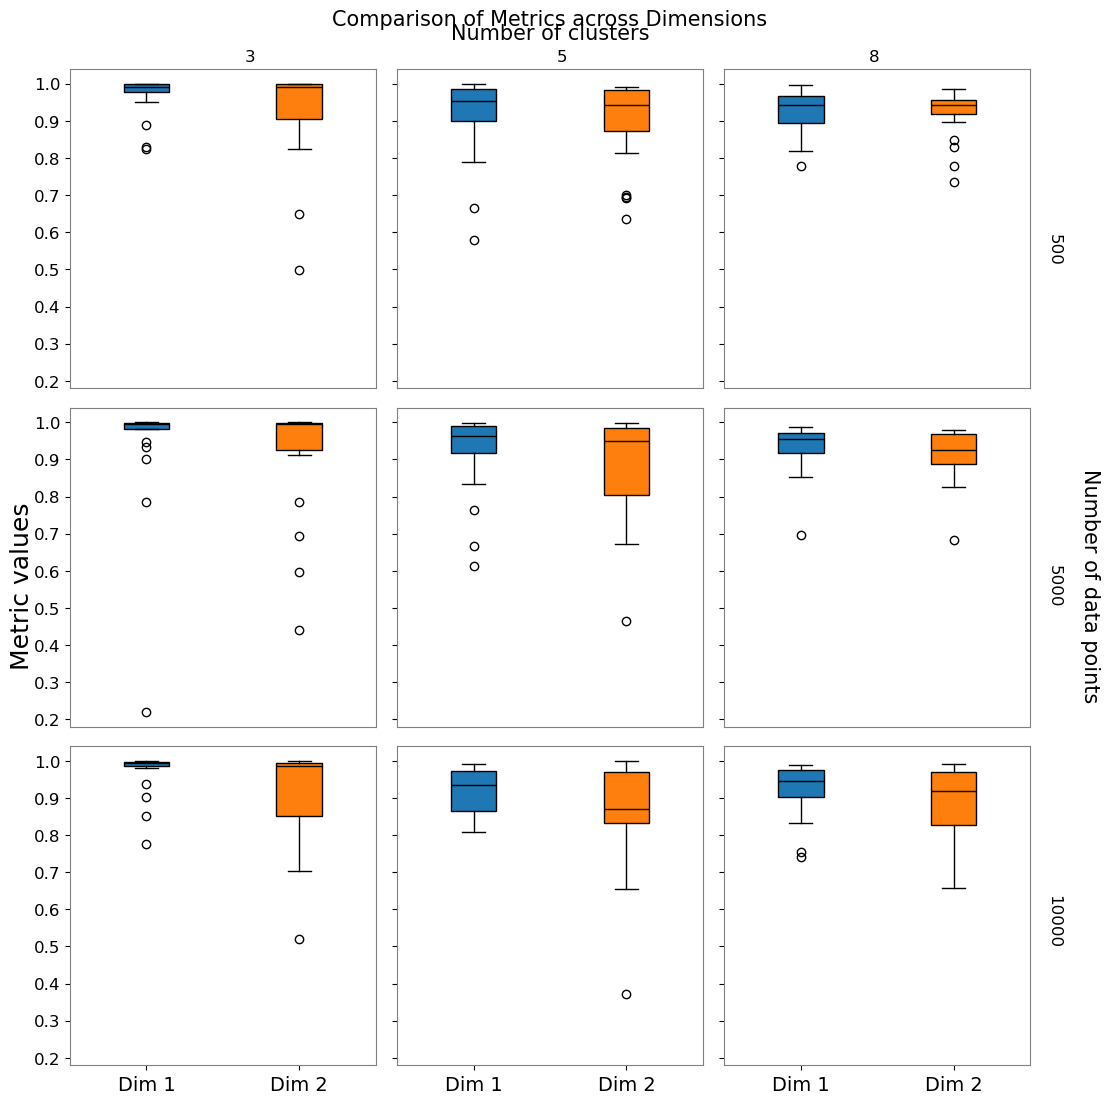

In [16]:
# Input data for the plot
N_values = [500, 5000, 10000]
K_values = [3, 5, 8]
D_value = 2

# Create the figure and axes for the subplots
fig, axes = plt.subplots(len(N_values), len(K_values), figsize=(12, 12), sharey=True)

# Loop over the specified values of N and K
for i, N in enumerate(N_values):
    for j, K in enumerate(K_values):
        # File paths for Dimension 1 and Dimension 2 accuracy data
        filename_acc_dim1 = general_folder + f"D_{D_value}/acc_per_dimension/acc_N_{N}_K_{K}_D_{D_value}_1.txt"
        filename_acc_dim2 = general_folder + f"D_{D_value}/acc_per_dimension/acc_N_{N}_K_{K}_D_{D_value}_2.txt"

        # Read data if the files exist
        data_acc_dim1 = pd.read_csv(filename_acc_dim1, header=None).squeeze() if os.path.isfile(filename_acc_dim1) else None
        data_acc_dim2 = pd.read_csv(filename_acc_dim2, header=None).squeeze() if os.path.isfile(filename_acc_dim2) else None

        # Plot the boxplots only if both datasets are available
        if data_acc_dim1 is not None and data_acc_dim2 is not None:
            ax = axes[i, j]
            box = ax.boxplot(
                [data_acc_dim1, data_acc_dim2], 
                notch=False, 
                patch_artist=True, 
                widths=0.3, 
                labels=['Dim 1', 'Dim 2']
            )

            # Set x-tick labels only for the last row
            if i == len(N_values) - 1:
                ax.set_xticklabels(['Dim 1', 'Dim 2'], fontsize=14)
            else:
                ax.set_xticks([])  # Remove x-ticks for other rows

            # Set font size for y-axis tick labels
            ax.tick_params(axis='y', labelsize=12)

            # Set color for the boxplots
            box['boxes'][0].set_facecolor('tab:blue')  # Dimension 1
            box['boxes'][1].set_facecolor('tab:orange')  # Dimension 2
            for box_elem in box['boxes']:
                box_elem.set_edgecolor('black')

            # Set the color of all lines in the boxplot to black
            for line_type in ['whiskers', 'caps', 'medians', 'fliers']:
                for line in box[line_type]:
                    line.set_color('black')

            # Make all the spines (borders) visible and set color
            for spine in ax.spines.values():
                spine.set_visible(True)
                spine.set_edgecolor('gray')

# Adding external labels for rows (Number of data points) and columns (Number of clusters)
for j, K in enumerate(K_values):
    fig.text(0.25 + j * 0.26, 0.94, f'{K}', va='center', ha='center', fontsize=12)
fig.text(0.5, 0.96, 'Number of clusters', va='center', ha='center', fontsize=15)

for i, N in enumerate(N_values):
    fig.text(0.92, 0.78 - i * 0.28, f'{N}', va='center', ha='center', rotation=-90, fontsize=12)
fig.text(0.95, 0.5, 'Number of data points', va='center', ha='center', rotation=-90, fontsize=15)

# Set the overall Y-axis label
fig.text(0.05, 0.5, 'Metric values', va='center', rotation='vertical', fontsize=18)

# Adjust layout to make space for the plot
plt.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])
plt.subplots_adjust(left=0.1, right=0.9, top=0.93, bottom=0.1)

# Title
plt.suptitle("Comparison of Metrics across Dimensions", fontsize=15)

# Show plot
plt.show()


### Accuracy D = 3

In [17]:
import os
import re
import ast

dim = 3
directory = general_folder + f"D_{dim}/csv/"


# Regular expression pattern to match the file names and extract N, K, D, and df values
pattern = re.compile(r'N_(\d+)_K_(\d+)_D_(\d+)_df_(\d+)\.csv')

# Dictionaries to store accuracy values for each (N, K, D) combination
accuracy_dict_1 = {}
accuracy_dict_2 = {}
accuracy_dict_3 = {}

# Iterate through files in the specified directory
for filename in os.listdir(directory):
    match = pattern.match(filename)
    if match:
        # Extract N, K, D, and df values from the file name
        N, K, D, df = map(int, match.groups())
        file_path = os.path.join(directory, filename)

        try:
            # Read the CSV file
            df_data = pd.read_csv(file_path)

            # Check if the necessary columns are present
            if 'True_distribution' in df_data.columns and 'Pred_distribution' in df_data.columns:
                true_dist = np.array([ast.literal_eval(item) for item in df_data['True_distribution']])
                pred_dist = np.array([ast.literal_eval(item) for item in df_data['Pred_distribution']])
                
                # Calculate accuracy for both dimensions
                accuracy_dim1 = np.mean(true_dist[:, 0] == pred_dist[:, 0])
                accuracy_dim2 = np.mean(true_dist[:, 1] == pred_dist[:, 1])
                accuracy_dim3 = np.mean(true_dist[:, 2] == pred_dist[:, 2])

                # Store accuracies in separate dictionaries
                if (N, K, D) not in accuracy_dict_1:
                    accuracy_dict_1[(N, K, D)] = []
                accuracy_dict_1[(N, K, D)].append((df, accuracy_dim1))

                if (N, K, D) not in accuracy_dict_2:
                    accuracy_dict_2[(N, K, D)] = []
                accuracy_dict_2[(N, K, D)].append((df, accuracy_dim2))

                if (N, K, D) not in accuracy_dict_3:
                    accuracy_dict_3[(N, K, D)] = []
                accuracy_dict_3[(N, K, D)].append((df, accuracy_dim3))

        except Exception as e:
            print(f"Error processing file {filename}: {e}")

# Write accuracy values to text files for each (N, K, D) combination
for (N, K, D), acc_list in accuracy_dict_1.items():
    output_directory = f"./results/p_{str(purity).replace('.', '')}_cov_{coverage}_old/D_{D}/acc_per_dimension"
    os.makedirs(output_directory, exist_ok=True)
    output_file_path = os.path.join(output_directory, f'acc_N_{N}_K_{K}_D_{D}_1.txt')
    with open(output_file_path, 'w') as f:
        for _, accuracy in acc_list:
            f.write(f"{accuracy}\n")
    print(f'Accuracy values for N={N}, K={K}, D={D} (Dim 1) written to {output_file_path}')

for (N, K, D), acc_list in accuracy_dict_2.items():
    output_directory = f"./results/p_{str(purity).replace('.', '')}_cov_{coverage}_old/D_{D}/acc_per_dimension"
    os.makedirs(output_directory, exist_ok=True)
    output_file_path = os.path.join(output_directory, f'acc_N_{N}_K_{K}_D_{D}_2.txt')
    with open(output_file_path, 'w') as f:
        for _, accuracy in acc_list:
            f.write(f"{accuracy}\n")
    print(f'Accuracy values for N={N}, K={K}, D={D} (Dim 2) written to {output_file_path}')


for (N, K, D), acc_list in accuracy_dict_3.items():
    output_directory = f"./results/p_{str(purity).replace('.', '')}_cov_{coverage}_old/D_{D}/acc_per_dimension"
    os.makedirs(output_directory, exist_ok=True)
    output_file_path = os.path.join(output_directory, f'acc_N_{N}_K_{K}_D_{D}_3.txt')
    with open(output_file_path, 'w') as f:
        for _, accuracy in acc_list:
            f.write(f"{accuracy}\n")
    print(f'Accuracy values for N={N}, K={K}, D={D} (Dim 3) written to {output_file_path}')


Accuracy values for N=500, K=5, D=3 (Dim 1) written to ./results/p_10_cov_100_old/D_3/acc_per_dimension/acc_N_500_K_5_D_3_1.txt
Accuracy values for N=10000, K=3, D=3 (Dim 1) written to ./results/p_10_cov_100_old/D_3/acc_per_dimension/acc_N_10000_K_3_D_3_1.txt
Accuracy values for N=5000, K=5, D=3 (Dim 1) written to ./results/p_10_cov_100_old/D_3/acc_per_dimension/acc_N_5000_K_5_D_3_1.txt
Accuracy values for N=10000, K=8, D=3 (Dim 1) written to ./results/p_10_cov_100_old/D_3/acc_per_dimension/acc_N_10000_K_8_D_3_1.txt
Accuracy values for N=500, K=8, D=3 (Dim 1) written to ./results/p_10_cov_100_old/D_3/acc_per_dimension/acc_N_500_K_8_D_3_1.txt
Accuracy values for N=5000, K=3, D=3 (Dim 1) written to ./results/p_10_cov_100_old/D_3/acc_per_dimension/acc_N_5000_K_3_D_3_1.txt
Accuracy values for N=5000, K=8, D=3 (Dim 1) written to ./results/p_10_cov_100_old/D_3/acc_per_dimension/acc_N_5000_K_8_D_3_1.txt
Accuracy values for N=10000, K=5, D=3 (Dim 1) written to ./results/p_10_cov_100_old/D_3/ac

/var/folders/z4/6ll9fb5s3k52m037sj27846c0000gn/T/ipykernel_2635/1078375912.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(
/var/folders/z4/6ll9fb5s3k52m037sj27846c0000gn/T/ipykernel_2635/1078375912.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(
/var/folders/z4/6ll9fb5s3k52m037sj27846c0000gn/T/ipykernel_2635/1078375912.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(
/var/folders/z4/6ll9fb5s3k52m037sj27846c0000gn/T/ipykernel_2635/1078375912.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Ma

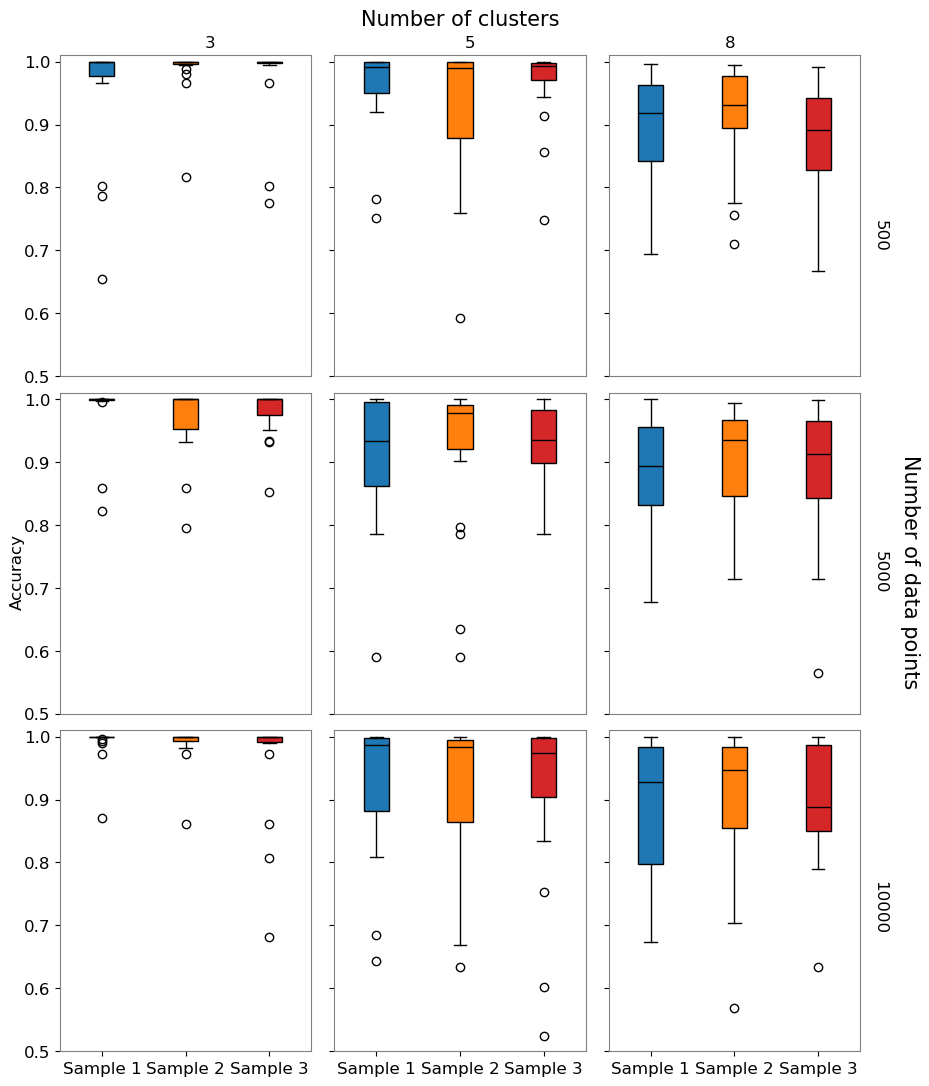

In [28]:
# Input data for the plot
N_values = [500, 5000, 10000]
K_values = [3, 5, 8]
D_value = 3

# Create the figure and axes for the subplots
fig, axes = plt.subplots(len(N_values), len(K_values), figsize=(10, 12), sharey=True)

# Loop over the specified values of N and K
for i, N in enumerate(N_values):
    for j, K in enumerate(K_values):
        # File paths for Dimension 1 and Dimension 2 accuracy data
        filename_acc_dim1 = general_folder + f"D_{D_value}/acc_per_dimension/acc_N_{N}_K_{K}_D_{D_value}_1.txt"
        filename_acc_dim2 = general_folder + f"D_{D_value}/acc_per_dimension/acc_N_{N}_K_{K}_D_{D_value}_2.txt"
        filename_acc_dim3 = general_folder + f"D_{D_value}/acc_per_dimension/acc_N_{N}_K_{K}_D_{D_value}_3.txt"

        # Read data if the files exist
        data_acc_dim1 = pd.read_csv(filename_acc_dim1, header=None).squeeze() if os.path.isfile(filename_acc_dim1) else None
        data_acc_dim2 = pd.read_csv(filename_acc_dim2, header=None).squeeze() if os.path.isfile(filename_acc_dim2) else None
        data_acc_dim3 = pd.read_csv(filename_acc_dim3, header=None).squeeze() if os.path.isfile(filename_acc_dim3) else None

        # Plot the boxplots only if both datasets are available
        if data_acc_dim1 is not None and data_acc_dim2 is not None and data_acc_dim3 is not None :
            ax = axes[i, j]
            box = ax.boxplot(
                [data_acc_dim1, data_acc_dim2, data_acc_dim3], 
                notch=False, 
                patch_artist=True, 
                widths=0.3, 
                labels=['Sample 1', 'Sample 2', 'Sample 3']
            )

            # Set x-tick labels only for the last row
            if i == len(N_values) - 1:
                ax.set_xticklabels(['Sample 1', 'Sample 2', 'Sample 3'], fontsize=12)
            else:
                ax.set_xticks([])  # Remove x-ticks for other rows

            # Set font size for y-axis tick labels
            ax.tick_params(axis='y', labelsize=12)

            # Set color for the boxplots
            box['boxes'][0].set_facecolor('tab:blue')  # Dimension 1
            box['boxes'][1].set_facecolor('tab:orange')  # Dimension 2
            box['boxes'][2].set_facecolor('tab:red')  # Dimension 2
            for box_elem in box['boxes']:
                box_elem.set_edgecolor('black')

            # Set the color of all lines in the boxplot to black
            for line_type in ['whiskers', 'caps', 'medians', 'fliers']:
                for line in box[line_type]:
                    line.set_color('black')

            # Make all the spines (borders) visible and set color
            for spine in ax.spines.values():
                spine.set_visible(True)
                spine.set_edgecolor('gray')

# Adding external labels for rows (Number of data points) and columns (Number of clusters)
for j, K in enumerate(K_values):
    fig.text(0.25 + j * 0.26, 0.94, f'{K}', va='center', ha='center', fontsize=12)
fig.text(0.5, 0.96, 'Number of clusters', va='center', ha='center', fontsize=15)

for i, N in enumerate(N_values):
    fig.text(0.92, 0.78 - i * 0.28, f'{N}', va='center', ha='center', rotation=-90, fontsize=12)
fig.text(0.95, 0.5, 'Number of data points', va='center', ha='center', rotation=-90, fontsize=15)

# Set the overall Y-axis label
fig.text(0.05, 0.5, 'Accuracy', va='center', rotation='vertical', fontsize=12)

# Adjust layout to make space for the plot
plt.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])
plt.subplots_adjust(left=0.1, right=0.9, top=0.93, bottom=0.1)

# Title
# plt.suptitle("Accuracy", fontsize=15)

plt.ylim([0.5, 1.01])

# Show plot
plt.show()
